Accuracy: 0.959731543624161

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     11906
           1       1.00      0.17      0.30       610

    accuracy                           0.96     12516
   macro avg       0.98      0.59      0.64     12516
weighted avg       0.96      0.96      0.95     12516



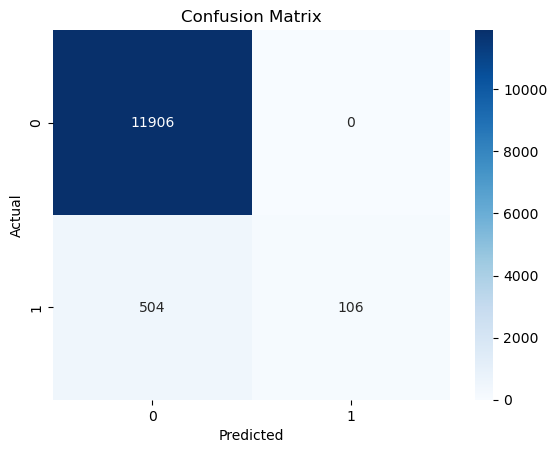

Model and vectorizer saved as 'logistic_job_fraud_model.pkl'
✅ Raw data saved to data/raw_data.csv


In [1]:
# train_model.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Load the dataset
df = pd.read_csv("Job_Frauds.csv", encoding='latin-1')  # Replace with your actual dataset name

# Fill missing values
df.fillna("", inplace=True)

# Combine text fields into one
df['combined_text'] = (
    df['Job Title'] + " " +
    df['Profile'] + " " +
    df['Job_Description'] + " " +
    df['Requirements'] + " " +
    df['Job_Benefits']
)

# Create feature and target
X = df['combined_text']
y = df['Fraudulent']  # 0 = Legit, 1 = Scam

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the model and vectorizer
joblib.dump((vectorizer, model), "logistic_job_fraud_model.pkl")
print("Model and vectorizer saved as 'logistic_job_fraud_model.pkl'")
import os

# Ensure the 'data' directory exists
os.makedirs("data", exist_ok=True)

# Save raw data
df.to_csv("data/raw_data.csv", index=False)
print("✅ Raw data saved to data/raw_data.csv")
# Save model and vectorizer
joblib.dump((vectorizer, model), "logistic_job_fraud_model.pkl")

# Save accuracy separately
with open("data/model_accuracy.txt", "w") as f:
    f.write(f"{accuracy_score(y_test, y_pred):.4f}")



In [2]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load model
vectorizer, model = joblib.load("logistic_job_fraud_model.pkl")

# Sidebar
st.sidebar.title("📊 Correlation Matrix")

try:
    raw_data = pd.read_csv("data/raw_data.csv")
    st.sidebar.write("Raw data preview:", raw_data.head())
    corr = raw_data.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap="coolwarm", ax=ax)
    st.sidebar.pyplot(fig)
except Exception as e:
    st.sidebar.warning("Couldn't load correlation matrix.")

# Main Page
st.title("🛡️ Job Fraud Detector")
st.write("Paste a job ad to check if it may be fraudulent.")

text_input = st.text_area("Job Post Text", height=300)

if st.button("Analyze"):
    if text_input.strip():
        tf_input = vectorizer.transform([text_input])
        pred = model.predict(tf_input)[0]
# Load model
vectorizer, model = joblib.load("logistic_job_fraud_model.pkl")

# Load model accuracy
try:
    with open("data/model_accuracy.txt", "r") as f:
        model_accuracy = float(f.read().strip())
except:
    model_accuracy = None

# Main Page

if model_accuracy is not None:
    st.markdown(f"**Model Accuracy:** {model_accuracy:.2%}")
else:
    st.warning("Model accuracy not available.")





Overwriting app.py


In [ ]:
!streamlit run app.py